<a href="https://colab.research.google.com/github/osmarbraz/exemplos_gensim/blob/master/Exemplo_Gensim_pt_br_Wikipedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo Word Embedding(pt-br) usando Gensim e Wikipedia(pt-br)

Exemplo de embendding usando Gensim Python Library com execução através do Google Colaboratory.<br>
É Biblioteca open-source para modelagem de tópicos não supervisionados e processamento de linguagem.
Implementado em Python e Cython. 
Projetado para lidar com grandes volumes de texto, usando fluxo de dados e algoritmos on-line incrementais. 
Seu diferencial em relação a maioria dos outros software para aprendizado de máquina os quais visam apenas o processamento em memória.<br>
https://radimrehurek.com/gensim/





# Preparação do ambiente
Preparação do ambiente para executar o gensim.

##Tratamento de logs

In [1]:
#Biblioteca de logging
import logging

#Formato da mensagem
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Parâmetros
Parâmetros da execução do teste

In [2]:
#Id do arquivo no Google Drive
idArquivo ='0B0ZXk88koS2KRDcwcV9IVWFTeUE'

#Definição do nome do arquivo compactado do modelo
arquivoModeloCompactado = 'pt.zip'

#Definição do nome do arquivo do modelo
arquivoModelo = 'pt.bin'

logging.info('Parâmetros definidos!')

2022-06-10 16:07:21,755 : INFO : Parâmetros definidos!


## Instalação

Instalando o gensim no Google Colaboratory.

No Jupiter Notebook executar através "Anaconda Prompt".


In [3]:
#!pip install -U gensim
!pip install -U gensim==3.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Instando o PyDrive no Google Colaboratory.

No Jupiter Notebook executar através "Anaconda Prompt".

PyDrive é uma biblioteca de manipulação de arquivos para o google drive.<br>

https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2

In [4]:
 pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Bibliotecas

Importando as bibliotecas de manipulação de dos arquivos pydrive.<br>
https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html#

In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Biblioteca para descompactar o arquivo
import zipfile

#Biblioteca para acessar o sistema de arquivos
import os

logging.info('Import realizado!')

2022-06-10 16:07:37,045 : INFO : Import realizado!


## Autenticação do usuário

O usuário precisar conceder  permissão para o **Google Cloud SDK** acessar o seu Google Colaboratory.

Copie o código de autorização da URL apresentada na janela aberta e copie e cole na caixa do código de autorização.


In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Download
Para usar o Gensim, você pode criar o seu vetor de palavras e treiná-lo ou utilizar um dataset previamente treinado.

Neste apresentação utilizamos o dataset fornecido por Kyubyong Park, disponível em https://github.com/Kyubyong/wordvectors
São dados da Wikipidia Brasileira com:<br>
*   300 dimensões
*   1G Corpus
*   50246 vocabulário

É possível utilizar de :
http://nilc.icmc.usp.br/embeddings

Link para o arquivo no google drive:
https://drive.google.com/open?id=0B0ZXk88koS2KRDcwcV9IVWFTeUE<br>

O arquivo do download será colocado na pasta "**/content**" do Google Colaboratory.<br> Opcionalmente pode ser feito o download para uma pasta no Google Drive. Neste caso é necessário montar uma pasta no Google Drive no Google Colaboratory para receber o arquivo.

In [7]:
#verifica se o arquivo do modelo existe
if not os.path.exists(arquivoModeloCompactado):  
    #Realiza o download do arquivo
    downloaded = drive.CreateFile({'id':idArquivo})

    #salva o arquivo no diretório 'content' do colab
    downloaded.GetContentFile(arquivoModeloCompactado)

    logging.info('Arquivo {0} baixado'.format(arquivoModeloCompactado))
else:
    logging.info('Arquivo {0} já existe'.format(arquivoModeloCompactado))

2022-06-10 16:07:37,460 : INFO : Arquivo pt.zip já existe


Descompacta o arquivo do modelo.

In [8]:
with zipfile.ZipFile(arquivoModeloCompactado,"r") as zip_ref:
    zip_ref.extractall('.')
logging.info('Arquivo {0} descompactado'.format(arquivoModeloCompactado))

2022-06-10 16:07:42,821 : INFO : Arquivo pt.zip descompactado


Mostra o diretório corrente e seus arquivos.

In [9]:
!pwd
!ls -la

/content
total 539108
drwxr-xr-x 1 root root      4096 Jun 10 16:00 .
drwxr-xr-x 1 root root      4096 Jun 10 15:57 ..
drwxr-xr-x 1 root root      4096 Jun 10 15:59 .config
-rw-r--r-- 1 root root   4051167 Jun 10 16:07 pt.bin
-rw-r--r-- 1 root root  60295280 Jun 10 16:07 pt.bin.syn0.npy
-rw-r--r-- 1 root root  60295280 Jun 10 16:07 pt.bin.syn1neg.npy
-rw-r--r-- 1 root root 224089398 Jun 10 16:07 pt.tsv
-rw-r--r-- 1 root root 203269084 Jun 10 15:59 pt.zip
drwxr-xr-x 1 root root      4096 Jun  1 13:50 sample_data


# Prepara o modelo
Carrega as bibliotecas e modelo pré treinado para executar os exemplos.

##Importando as bibliotecas do Gensim
Importa as biblitecas do Gensim para carregar o modelo pré treinado.

In [10]:
from IPython.display import display, HTML
from jinja2 import Template

import warnings
warnings.filterwarnings('ignore')

import numpy as np  
import gensim
from gensim.models import Word2Vec

logging.info('Import realizado!')

2022-06-10 16:07:44,313 : INFO : Import realizado!


##Carregando o modelo

In [11]:
model = Word2Vec.load(arquivoModelo)
logging.info('Modelo carregado!')

2022-06-10 16:07:44,331 : INFO : loading Word2Vec object from pt.bin
2022-06-10 16:07:44,697 : INFO : loading syn1neg from pt.bin.syn1neg.npy with mmap=None
2022-06-10 16:07:44,778 : INFO : Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
2022-06-10 16:07:44,781 : INFO : loading Word2Vec object from pt.bin
2022-06-10 16:07:45,073 : INFO : loading syn1neg from pt.bin.syn1neg.npy with mmap=None
2022-06-10 16:07:45,187 : INFO : loading syn0 from pt.bin.syn0.npy with mmap=None
2022-06-10 16:07:45,279 : INFO : setting ignored attribute syn0norm to None
2022-06-10 16:07:45,284 : INFO : setting ignored attribute cum_table to None
2022-06-10 16:07:45,288 : INFO : loaded pt.bin
2022-06-10 16:07:45,528 : INFO : Modelo carregado!


Mostra alguns dados do modelo carregado para saber se ele foi carregado.

In [12]:
print(model)

Word2Vec(vocab=50246, size=300, alpha=0.025)


Mostra os dados da palavra rei.

In [13]:
model.most_similar('rei')

2022-06-10 16:07:45,562 : INFO : precomputing L2-norms of word weight vectors


[('monarca', 0.7494288086891174),
 ('imperador', 0.7331966161727905),
 ('soberano', 0.7012052536010742),
 ('sultão', 0.6885693073272705),
 ('príncipe', 0.6859150528907776),
 ('faraó', 0.6376820206642151),
 ('governante', 0.6339693665504456),
 ('califa', 0.6284059286117554),
 ('trono', 0.62713623046875),
 ('condestável', 0.626724362373352)]

##Função de apresentação dos dados
Função para melhorar a apresentação dos dados dos exemplos.

In [14]:
table_list_template = """ 
<table> 
        <tr>  
           <th>Palavra</th>   
           <th>Similaridade</th>   
        </tr>  
        {% for item in items%}  
        <TR>     
           <TD class="c1">{{item[0]}}</TD>     
           <TD class="c2">{{item[1]}}</TD>   
        </TR>   
        {% endfor %}
</table> 
"""
def most_similar(positive, negative):
    nn = model.most_similar(positive=positive, negative=negative)
    tmpl = Template(table_list_template)
    output_html = tmpl.render(items=nn)
    return HTML(output_html)

logging.info('Função criada')

2022-06-10 16:07:45,756 : INFO : Função criada


# Exemplos

**DICA**:<br>
Para palavras com sinais léxicos, utilizar o caractere "**u**" antes da mesma para codifica-la como utf-8.


## Comparando palavras diferentes

Rei + Mulher – Homem = ?

In [15]:
most_similar(positive=['rei','mulher'], negative=['homem'])


Palavra,Similaridade,esposa,0.6144844889640808,rainha,0.611359715461731,concubina,0.5916263461112976,infanta,0.5631893873214722,princesa,0.5480406880378723,meia-irmã,0.5469870567321777,sogra,0.5410431623458862,sobrinha,0.5393416881561279,consorte,0.5316817760467529,enteada,0.5275902152061462


Rainha + Homem – Mulher = ?

In [16]:
most_similar(positive=[u'rainha',u'homem'], negative=[u'mulher'])

Palavra,Similaridade,rei,0.5526444315910339,monarca,0.4919430911540985,soberano,0.4747419059276581,faraó,0.46988749504089355,lorde,0.4698619246482849,feiticeiro,0.4680941700935364,mago,0.4573228359222412,cavaleiro,0.44940516352653503,tirano,0.4414573609828949,governante,0.436655193567276


Brasil + Criminalidade = ?

In [17]:
most_similar(positive=['brasil',u'criminalidade'], negative=[])

Palavra,Similaridade,desemprego,0.5486825704574585,analfabetismo,0.5426269769668579,país,0.5171329975128174,narcotráfico,0.4638100266456604,violência,0.4453565180301666,japão,0.4394608736038208,tráfico,0.43780517578125,ceará,0.43459832668304443,corrupção,0.4236491620540619,paraná,0.4112812876701355


Outros exemplos:

In [18]:
most_similar(positive=['presidente'], negative=['poder'])

Palavra,Similaridade,vice-presidente,0.5688396692276001,ex-presidente,0.5431381464004517,diretor-presidente,0.49868297576904297,diretor-geral,0.48487648367881775,secretário-geral,0.46164095401763916,presidenta,0.46091073751449585,diretor,0.4383924901485443,presidiu,0.413305401802063,secretário,0.407117635011673,director,0.40545815229415894


In [19]:
most_similar(positive=['brasil','estudo'], negative=['carnaval'])

Palavra,Similaridade,melhoramento,0.45786750316619873,forense,0.4252932667732239,paleontologia,0.4232260584831238,mapeamento,0.4224932789802551,neurociência,0.4180487394332886,desenvolvimento,0.41441261768341064,aprimoramento,0.4095667004585266,biologia,0.40606528520584106,levantamento,0.4052814245223999,pesquisador,0.4032500088214874


In [20]:
most_similar(positive=['brasil','universidade'], negative=[])

Palavra,Similaridade,ufrgs,0.5644423365592957,faculdade,0.5495591759681702,ufrj,0.547903299331665,puc,0.5465572476387024,ufba,0.5446711778640747,ufsc,0.5425704121589661,puc-rio,0.5409955978393555,ufpr,0.5374286770820618,uerj,0.534567654132843,unb,0.5338500738143921


In [21]:
most_similar(positive=[u'homem',u'máquina'], negative=[])

Palavra,Similaridade,criatura,0.5730695724487305,maquina,0.5264643430709839,andróide,0.520221471786499,robô,0.5179541110992432,mente,0.5079346299171448,rapaz,0.5008567571640015,indivíduo,0.4992363452911377,pessoa,0.49798405170440674,monstro,0.4947267770767212,demônio,0.4884161353111267


In [22]:
most_similar(positive=[u'palio',u'vw'], negative=[u'fiat'])

Palavra,Similaridade,passat,0.712925910949707,escort,0.6524723768234253,wd,0.6207202076911926,vectra,0.5918048024177551,sedã,0.591141939163208,sx,0.5873299241065979,pick-up,0.5720714926719666,wagon,0.5702877640724182,coupé,0.5611929893493652,chevrolet,0.5557495951652527


In [23]:
most_similar(positive=[u'roma',u'alemanha'], negative=[u'itália'])

Palavra,Similaridade,berlim,0.6261874437332153,constantinopla,0.5816317200660706,viena,0.5595096945762634,atenas,0.5329298377037048,munique,0.5300965905189514,nuremberga,0.5072953701019287,basileia,0.49195024371147156,mogúncia,0.48629167675971985,moscou,0.48231738805770874,jerusalém,0.4798382520675659


In [24]:
most_similar(positive=[u'lendo',u'jogado'], negative=[u'lido'])

Palavra,Similaridade,jogando,0.6318348050117493,treinando,0.5323308706283569,mexendo,0.5291001796722412,brincando,0.5140507221221924,pulando,0.513100266456604,pegando,0.5071084499359131,conversando,0.4930493235588074,caçando,0.4889841079711914,dormindo,0.48623234033584595,arrumando,0.48261088132858276


In [25]:
most_similar(positive=[u'nuvens',u'estrela'], negative=[u'nuvem'])

Palavra,Similaridade,estrelas,0.6460617780685425,franjas,0.4863198399543762,luzes,0.4823385775089264,calotas,0.4765215516090393,luas,0.4707491993904114,serras,0.4684773087501526,constelações,0.466329425573349,montanhas,0.4661306142807007,raias,0.4655386805534363,pombas,0.4616527259349823


In [26]:
most_similar(positive=[u'tenista',u'futebol'], negative=[u'tênis'])

Palavra,Similaridade,futebolista,0.6371703743934631,basquetebolista,0.6129305362701416,ciclista,0.610839307308197,automobilista,0.6076284050941467,ex-futebolista,0.6029376983642578,pugilista,0.5458148717880249,ex-atleta,0.5337576866149902,judoca,0.5130996704101562,atleta,0.5124358534812927,ginasta,0.5090248584747314


In [27]:
most_similar(positive=[u'tenista',u'xadrez'], negative=[u'tênis'])	

Palavra,Similaridade,enxadrista,0.6550182104110718,automobilista,0.49404847621917725,ginasta,0.47963181138038635,ciclista,0.4784576892852783,basquetebolista,0.47705739736557007,ex-ginasta,0.4660647213459015,ex-futebolista,0.46401160955429077,alekhine,0.4611126184463501,judoca,0.4517190456390381,ex-atleta,0.44765692949295044


## Comparando palavras iguais

Frase de exemplo

In [28]:
texto = "Depois de roubar o cofre do banco,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

logging.info('Texto armazenado!')

2022-06-10 16:07:46,499 : INFO : Texto armazenado!


In [29]:
palavras = [texto.split()]
print(palavras)

[['Depois', 'de', 'roubar', 'o', 'cofre', 'do', 'banco,', 'o', 'ladrão', 'de', 'banco', 'foi', 'visto', 'sentado', 'no', 'banco', 'da', 'praça', 'central.']]


Carrega o vocabulário do modelo somente com as palavras dos texto

In [30]:
model = Word2Vec(palavras, min_count=1)

print(model)

2022-06-10 16:07:46,579 : INFO : collecting all words and their counts
2022-06-10 16:07:46,587 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-06-10 16:07:46,590 : INFO : collected 16 word types from a corpus of 19 raw words and 1 sentences
2022-06-10 16:07:46,592 : INFO : Loading a fresh vocabulary
2022-06-10 16:07:46,594 : INFO : effective_min_count=1 retains 16 unique words (100% of original 16, drops 0)
2022-06-10 16:07:46,596 : INFO : effective_min_count=1 leaves 19 word corpus (100% of original 19, drops 0)
2022-06-10 16:07:46,598 : INFO : deleting the raw counts dictionary of 16 items
2022-06-10 16:07:46,599 : INFO : sample=0.001 downsamples 16 most-common words
2022-06-10 16:07:46,601 : INFO : downsampling leaves estimated 2 word corpus (14.1% of prior 19)
2022-06-10 16:07:46,603 : INFO : estimated required memory for 16 words and 100 dimensions: 20800 bytes
2022-06-10 16:07:46,605 : INFO : resetting layer weights
2022-06-10 16:07:46,620 : INFO :

Word2Vec(vocab=16, size=100, alpha=0.025)


Imprime o vocabulário.

In [31]:
words = list(model.wv.vocab)
i = 0
for token in words:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco,
7 ladrão
8 banco
9 foi
10 visto
11 sentado
12 no
13 da
14 praça
15 central.


A palavra banco possui somente uma entrada no modelo somente um conjunto de pesos.

In [32]:
print(model['banco'])

[-2.5457775e-03  1.4359509e-03  1.3832868e-03  1.8350678e-03
 -2.8330076e-03 -2.6445051e-03 -2.2488015e-03 -8.9845841e-04
  2.4059794e-03 -4.7926232e-03 -4.1006589e-03 -4.4192271e-03
 -3.3047332e-03  4.9748081e-03 -3.8470021e-03 -4.2087208e-03
  2.4370442e-04  3.6782203e-03  1.7256486e-03 -1.8834688e-03
  1.2385409e-03  1.7091478e-03 -2.8932607e-03 -9.8737318e-04
 -2.1093246e-04  3.7477084e-03  2.1731525e-03 -3.7248281e-03
  3.0781780e-03  1.0763142e-03 -4.7339345e-03 -1.5523672e-03
  2.0267577e-03  9.2632446e-04  2.9702266e-03 -6.1565259e-04
 -2.8677322e-03  4.9328483e-03  4.5323707e-03 -1.2591229e-03
 -7.3662208e-04 -3.7705859e-03 -1.3236335e-03  2.3415736e-03
 -1.1306162e-03  2.3757210e-03 -1.5166152e-03 -1.7143147e-03
  3.6193922e-03  3.5913347e-03  9.1577385e-04  3.2548786e-03
  2.7405641e-03  8.5461161e-06  2.7365424e-03 -9.6954592e-04
  2.5389141e-03  4.7853687e-03 -8.4465515e-04 -4.6733487e-03
  5.1666901e-04  1.8476773e-03  4.3590800e-03 -3.9646830e-03
  2.9146268e-03 -4.01849

# Plotando gráficos

Carregando o modelo

In [33]:
model = Word2Vec.load(arquivoModelo)
logging.info('Modelo carregado!')

2022-06-10 16:07:46,893 : INFO : loading Word2Vec object from pt.bin
2022-06-10 16:07:47,084 : INFO : loading syn1neg from pt.bin.syn1neg.npy with mmap=None
2022-06-10 16:07:47,112 : INFO : Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
2022-06-10 16:07:47,113 : INFO : loading Word2Vec object from pt.bin
2022-06-10 16:07:47,347 : INFO : loading syn1neg from pt.bin.syn1neg.npy with mmap=None
2022-06-10 16:07:47,370 : INFO : loading syn0 from pt.bin.syn0.npy with mmap=None
2022-06-10 16:07:47,403 : INFO : setting ignored attribute syn0norm to None
2022-06-10 16:07:47,405 : INFO : setting ignored attribute cum_table to None
2022-06-10 16:07:47,417 : INFO : loaded pt.bin
2022-06-10 16:07:47,601 : INFO : Modelo carregado!


Para plotar um conjunto de palavras execute o script abaixo:

In [34]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

def plot_words(words):    
    #Carrega o vetor das palavras a serem plotadas
    vectors = []
    for word in words:    
         vectors.append(model[word])
    #Ajustar um modelo 2D de PCA aos vetores
    pca = PCA(n_components=2)
    resultado = pca.fit_transform(vectors)
    #Criar um gráfico de dispersão da projeção
    pyplot.scatter(resultado[:, 0], resultado[:, 1])
    #Adiciona as palavras no gráfico
    for i in range(len(words)):
        pyplot.annotate(words[i], xy=(resultado[i, 0], resultado[i, 1]))        
    #Mostra o gráfico
    pyplot.show()
logging.info('Função criada')

2022-06-10 16:07:47,709 : INFO : Função criada


O comando abaixo plota o gráfico das palavras especificadas.

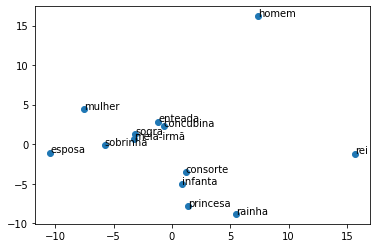

In [35]:
plot_words(['rei', 'rainha', 'homem', 'mulher','esposa','concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada'])

Lista as palavras do vocabulário

In [36]:
words = list(model.wv.vocab)
print(words)

['completada', 'sobrepõem', 'bloqueou', 'explodindo', 'woods', 'suzano', 'spiders', 'refletir', 'francesco', 'woody', 'suzana', 'telessérie', 'impotente', 'schlegel', 'sevens', 'canes', 'prazo', 'farão', 'igual', 'refletiu', 'hermann', 'hermano', 'apareçam', 'númenor', 'start.htm?sid', 'devoniano', 'biomas', 'trojan', 'cirúrgicas', 'capoeira', 'atingir', 'atingiu', 'unitária', 'broward', 'unitário', 'screaming', 'four', 'reparos', 'oponho', 'condessa', 'wednesday', 'uísque', 'moderadas', 'jazigo', 'detonautas', 'www.geocities.com', 'planejamento', 'candeia', 'kublai', 'moderado', 'cível', 'acordeon', 'lgbt', 'anulou', 'péssimas', 'francesca', 'marechal-de-campo', 'guardados', 'doutrinárias', 'semicircular', 'derrotado', 'itaporanga', 'distando', 'montevidéu', 'cicatriz', 'apelidou', 'usenet', 'sequencial', 'dialogo', 'numeral', 'ílhavo', 'crouch', 'dirigindo', 'romano-germânico', 'ching', 'linho', 'china', 'efetuado', 'efetuada', 'moderada', 'linha', 'mestres', 'kids', 'premissas', 'or

##Visualizando o modelo

Aqui tentamos visualizar a conexão entre as seguintes palavras em um subespaço 2D

### Função de visualização

In [37]:
#Import das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotar_words(Wl):
    #Carrega o vetor das palavras a serem plotadas
    Wv = []
    for i in range(len(Wl)):
       Wv.append(model[Wl[i]])

    #Queremos um subespaço onde Wv[0]-Wv[1] e Wv[2]-Wv[3] sejam as linhas do eixo, 
    #então essas 4 palavras estão no eixo correspondente
    b1 = (Wv[1]-Wv[0])
    b2 = (Wv[3]-Wv[2])

    #Transforma a lista de embeddings em um vetor simples
    W = np.array(Wv)
    #Transforma as diferenças em um vetor simples
    B = np.array([b1,b2])
    #Calcula o pseudo-inversa de uma matriz
    Bi = np.linalg.pinv(B.T)

    #Multiplica Bi e W.T
    Wp = np.matmul(Bi,W.T)
    #Calcula os pivos
    Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

    #Dimensões da figura
    plt.figure(figsize=(12,7))
    #Adiciona linha vertical
    plt.axvline()
    #Adiciona linha horizontal
    plt.axhline()
    #Criar um gráfico de dispersão da projeção
    plt.scatter(Wp[0,:], Wp[1,:])
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    eps = 0.005
    #Adiciona as palavras no gráfico
    for i, txt in enumerate(Wl):
        plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    #Mostra o gráfico
    plt.show()

logging.info('Função criada')

2022-06-10 16:07:48,065 : INFO : Função criada


#### Exemplo

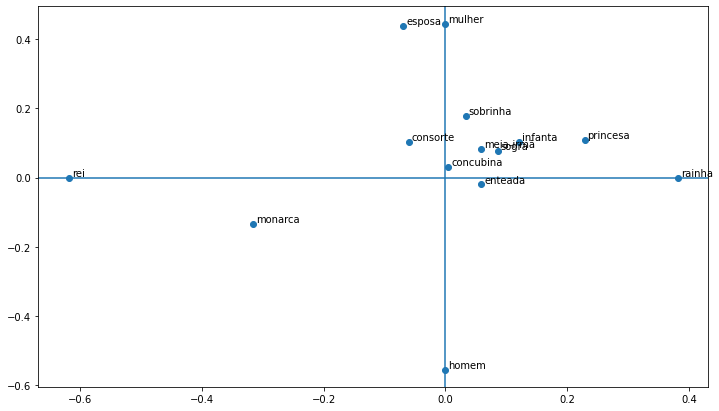

In [38]:
Wl =['rei', 'rainha', 'homem', 'mulher','esposa', 'monarca', 'concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']
plotar_words(Wl)

#### Detalhamento da função

Import das bibliotecas

In [39]:
#Import das bibliotecas
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Lista de palavras a serem visualizadas

In [40]:
#Lista das palavras
Wl = ['rei', 'rainha', 'homem', 'mulher','esposa', 'monarca', 'concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']

#Lista dos embeddings das palavras
Wv = []
for i in range(len(Wl)):
    Wv.append(model[Wl[i]])

Queremos um subespaço onde rei-rainha e homem-mulher são as linhas do eixo, então essas 4 palavras estão no eixo correspondente




In [41]:
#Diferença de Wv[1]-Wv[0]
b1 = (Wv[1]-Wv[0])
#Diferença de Wv[3]-Wv[2]
b2 = (Wv[3]-Wv[2])

Queremos que a base seja (1,0) e (0,1) do espaço projetado. Com uma matriz quadrada, devemos calcular a matriz inversa para obter os vetores base. No entanto, a matriz não quadrada tem apenas pseudo-inversa.

In [42]:
#Transforma a lista de embeddings em um vetor simples
W = np.array(Wv)
#Transforma as diferenças em um vetor simples
B = np.array([b1,b2])
#Calcula o pseudo-inversa de uma matriz
Bi = np.linalg.pinv(B.T)

In [43]:
#Mostra as dimensões de B e W
print(B.shape)
print(W.T.shape)

(2, 300)
(300, 14)


Projete todas as incorporações de palavras no subespaço 2D.

  Temos que mudar as linhas rei-rainha e homem-mulher para o eixo.

In [44]:
#Multiplica Bi e W.T
Wp = np.matmul(Bi,W.T)
print(Wp.shape)
#Calcula os pivos
Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

(2, 14)


Vamos colocar as palavras no plano cartesiano!

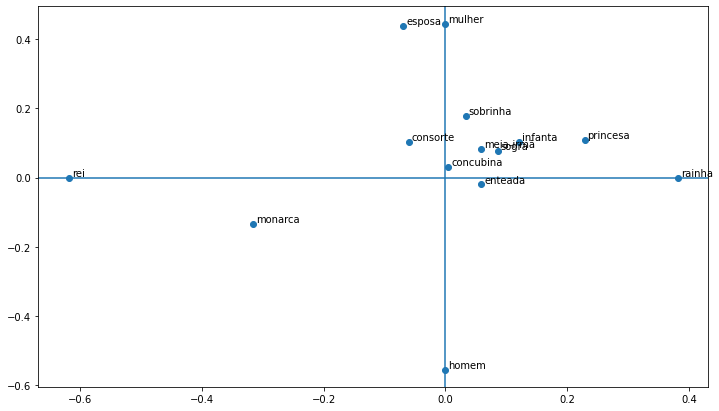

In [45]:
#Dimensões da figura
plt.figure(figsize=(12,7))
#Adiciona linha vertical
plt.axvline()
#Adiciona linha horizontal
plt.axhline()
#Plota eixo x e y
plt.scatter(Wp[0,:], Wp[1,:])
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
eps = 0.005
#Percore a lista de palavras
for i, txt in enumerate(Wl):
    plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
plt.show()

# Exemplo comparando os embeddings das ocorrências da palavra "banco" em uma sentença. 

## Comparando embeddings de palavras

In [46]:
texto = "Depois de roubar o cofre do banco ,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

logging.info('Texto armazenado!')

2022-06-10 16:07:48,920 : INFO : Texto armazenado!


In [47]:
palavras = texto.split()
print(palavras)

['Depois', 'de', 'roubar', 'o', 'cofre', 'do', 'banco', ',', 'o', 'ladrão', 'de', 'banco', 'foi', 'visto', 'sentado', 'no', 'banco', 'da', 'praça', 'central.']


Confirmando os tokens do documento

In [48]:
i = 0
for token in palavras:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco
7 ,
8 o
9 ladrão
10 de
11 banco
12 foi
13 visto
14 sentado
15 no
16 banco
17 da
18 praça
19 central.


Gera os embeddings

In [49]:
model = Word2Vec([palavras], min_count=1)

print(model)

2022-06-10 16:07:48,975 : INFO : collecting all words and their counts
2022-06-10 16:07:48,977 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-06-10 16:07:48,979 : INFO : collected 16 word types from a corpus of 20 raw words and 1 sentences
2022-06-10 16:07:48,980 : INFO : Loading a fresh vocabulary
2022-06-10 16:07:48,983 : INFO : effective_min_count=1 retains 16 unique words (100% of original 16, drops 0)
2022-06-10 16:07:48,985 : INFO : effective_min_count=1 leaves 20 word corpus (100% of original 20, drops 0)
2022-06-10 16:07:48,986 : INFO : deleting the raw counts dictionary of 16 items
2022-06-10 16:07:48,988 : INFO : sample=0.001 downsamples 16 most-common words
2022-06-10 16:07:48,989 : INFO : downsampling leaves estimated 2 word corpus (14.0% of prior 20)
2022-06-10 16:07:48,991 : INFO : estimated required memory for 16 words and 100 dimensions: 20800 bytes
2022-06-10 16:07:48,992 : INFO : resetting layer weights
2022-06-10 16:07:48,999 : INFO :

Word2Vec(vocab=16, size=100, alpha=0.025)


Palavras recuperadas do modelo

In [50]:
words = list(model.wv.vocab)
i = 0
for token in words:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco
7 ,
8 ladrão
9 foi
10 visto
11 sentado
12 no
13 da
14 praça
15 central.


Exibe os embenddings das palavras

A banco aparece somente no índices 6.

As outras ocorrências foram retiradas pois possuem a mesma representação.


In [51]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 11
palavra3 = 16

print("Os primeiros 5 valores de cada instância de \"banco\".")
print("")

print(str(words[palavra1]), model[words[palavra1]][:5])
print(str(words[palavra1]), model[words[palavra1]][:5])
print(str(words[palavra1]), model[words[palavra1]][:5])

Os primeiros 5 valores de cada instância de "banco".

banco [-0.00254896  0.00143449  0.00138621  0.00183185 -0.00283305]
banco [-0.00254896  0.00143449  0.00138621  0.00183185 -0.00283305]
banco [-0.00254896  0.00143449  0.00138621  0.00183185 -0.00283305]


In [52]:
# Importando as bibliotecas
from scipy.spatial.distance import cosine

# Índice das palavras a serem comparadas
print("Período:", texto)
print("Palavra 1 =", palavra1, "=", str(words[palavra1]), "(instituição financeira)")
print("Palavra 2 =", palavra2, "=", str(words[palavra1]), "(instituição financeira)")
print("Palavra 3 =", palavra3, "=", str(words[palavra1]), "(assento)")

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "banco da praça" (diferentes significados).
#banco_diferente = doc[palavra2].similarity(doc[palavra3])
banco_diferente = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para diferentes significados(",palavra2,",",palavra3,"):  %.2f" % banco_diferente)

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "cofre do banco" (mesmo significado).
mesmo_banco = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para mesmo significado(",palavra2,",",palavra1,"):  %.2f" % mesmo_banco)

# Calcula a similaridade de coseno entre as palavras banco
# Em "cofre do banco" versus "banco da praça" (diferente significados).
banco_diferente2 = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para diferentes significados(",palavra3,",",palavra1,"):  %.2f" % banco_diferente2)

Período: Depois de roubar o cofre do banco , o ladrão de banco foi visto sentado no banco da praça central.
Palavra 1 = 6 = banco (instituição financeira)
Palavra 2 = 11 = banco (instituição financeira)
Palavra 3 = 16 = banco (assento)
Vetor de similaridade  para diferentes significados( 11 , 16 ):  1.00
Vetor de similaridade  para mesmo significado( 11 , 6 ):  1.00
Vetor de similaridade  para diferentes significados( 16 , 6 ):  1.00


# Exemplo de palavras individuais

In [53]:
texto = "pilha fila enfileirar empilhar"
palavras = [texto.split()]
print(palavras)

[['pilha', 'fila', 'enfileirar', 'empilhar']]


In [54]:
model = Word2Vec(palavras, min_count=1)

2022-06-10 16:07:49,268 : INFO : collecting all words and their counts
2022-06-10 16:07:49,275 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-06-10 16:07:49,276 : INFO : collected 4 word types from a corpus of 4 raw words and 1 sentences
2022-06-10 16:07:49,278 : INFO : Loading a fresh vocabulary
2022-06-10 16:07:49,279 : INFO : effective_min_count=1 retains 4 unique words (100% of original 4, drops 0)
2022-06-10 16:07:49,281 : INFO : effective_min_count=1 leaves 4 word corpus (100% of original 4, drops 0)
2022-06-10 16:07:49,282 : INFO : deleting the raw counts dictionary of 4 items
2022-06-10 16:07:49,284 : INFO : sample=0.001 downsamples 4 most-common words
2022-06-10 16:07:49,285 : INFO : downsampling leaves estimated 0 word corpus (6.7% of prior 4)
2022-06-10 16:07:49,286 : INFO : estimated required memory for 4 words and 100 dimensions: 5200 bytes
2022-06-10 16:07:49,288 : INFO : resetting layer weights
2022-06-10 16:07:49,291 : INFO : training mo

In [55]:
print(model['pilha'])

[ 1.4519015e-03  2.0032965e-03 -2.9449717e-03  5.6786911e-04
 -8.1093347e-04 -1.2582663e-03 -1.5465064e-03  2.3564463e-04
  2.0381207e-04  4.4057644e-03  1.1410561e-03  6.1152782e-04
 -7.3766842e-04 -8.9902390e-04 -1.0089066e-03  3.2385273e-04
  3.7046763e-04 -2.2302598e-03  2.5870595e-03  1.9491962e-03
  2.0131997e-03  4.2220186e-03  3.2890302e-03 -1.1943905e-03
 -4.6870145e-03  6.6131249e-04  3.7397994e-03 -2.2219117e-03
  4.4980790e-03  4.6620755e-03  1.4364881e-03  3.6503526e-04
  1.3540459e-03 -4.1462621e-03  1.1750616e-03 -3.4373319e-03
 -1.8666254e-04 -3.5962745e-05  4.8867809e-03 -3.2296421e-03
  2.2236714e-03  6.0415402e-04 -3.0519622e-03 -3.0635152e-04
 -2.5490465e-04 -6.9701817e-04  4.4545163e-03 -2.8002181e-03
 -2.2489743e-03  2.0376109e-03 -2.8234280e-03 -1.4356698e-03
  4.6202117e-03 -1.5998386e-03 -2.3401671e-03  2.9202546e-03
 -3.3660568e-03  3.3262544e-03  4.7862362e-03  3.5659226e-03
  4.6694363e-03 -1.9283395e-03 -3.9056971e-04 -3.5696995e-04
  4.1121151e-03 -3.90247

In [56]:
print(model['fila'])

[ 4.4650598e-03  2.7012234e-03  1.3870993e-03 -4.7949972e-03
  2.2249776e-03  3.5992966e-03 -3.0890736e-03 -3.8254040e-03
  6.6750444e-04  3.9918981e-03 -1.1709321e-03  1.8738146e-03
 -2.0397773e-04 -1.7407115e-03 -2.9672969e-03 -4.3281526e-03
 -4.4384928e-04  9.2949765e-04  3.3267192e-03 -3.5497879e-03
 -2.0798033e-03  1.9533222e-03  2.1745320e-03 -1.0971567e-03
  2.3297409e-03 -1.4375513e-03  4.2534308e-04  1.9269019e-03
 -4.8698788e-03 -2.6395151e-03  3.5724896e-03 -9.0482767e-04
 -2.9981930e-03  1.2673197e-03 -3.2695415e-03  1.8749844e-03
  1.9283284e-03 -3.0698238e-03 -3.6981697e-03 -1.9729789e-03
 -3.3253781e-03  3.1149841e-03  2.7531991e-03 -3.0191059e-04
  9.5595984e-04 -2.7000392e-03  1.5052666e-04  9.9715358e-04
 -1.1857599e-03  5.3083868e-04  2.3653442e-03 -2.8115595e-03
  4.2649345e-03 -3.3227743e-03  2.0930993e-03 -2.1450007e-03
 -1.1068557e-03  3.5053547e-03  1.0668361e-05 -2.0811928e-03
 -3.6874220e-03 -4.7410051e-03  3.1033296e-03  3.8352520e-03
 -2.9273466e-03 -2.08080

In [57]:
print(model['empilhar'])

[ 2.8165763e-03  2.6952757e-03  1.0571343e-04 -9.5429353e-04
  8.5700734e-04 -2.0515225e-03  3.0466276e-03  4.5676981e-03
  1.1460163e-04 -4.5700572e-04 -1.5443447e-03 -4.4858796e-03
  7.0271565e-04 -3.3599744e-03  3.0250435e-03  4.4962275e-03
 -5.0462873e-05 -4.9327300e-03  4.1691316e-03 -1.0408844e-03
 -9.7627152e-04 -2.4053555e-03 -2.1767830e-03  1.4261787e-03
  4.3284679e-03 -8.9472224e-04 -4.9129303e-04 -3.6719217e-04
  1.5795234e-03 -3.2225158e-03 -3.0516498e-03  2.7302832e-03
 -2.5319797e-03  2.2950880e-03 -1.0201173e-03  3.9927810e-03
  1.8138609e-04  9.5875970e-05  3.4469245e-03 -7.1874697e-04
 -4.7147875e-03 -2.8800224e-03  4.3020155e-03 -1.1039193e-03
  2.1696308e-04  2.6166213e-03  3.9430954e-03  2.9262649e-03
 -1.8926766e-03  4.9429765e-04  2.4174831e-03  2.5269069e-04
  1.6531335e-03 -4.9033394e-04 -5.7256885e-04  1.3479379e-03
 -2.4191004e-03 -4.7000190e-03  1.2914612e-05  6.4456597e-04
 -4.1697402e-03 -2.2710224e-03 -5.9369107e-04  3.8381501e-03
 -3.9376915e-03 -7.43341

In [58]:
print(model['enfileirar'])

[-3.67917353e-03  2.51124543e-03  3.22354375e-03 -1.41263509e-03
 -1.58697565e-03 -6.05332549e-04  3.78998928e-03 -3.76336882e-03
 -3.98024777e-03 -3.70667060e-03  1.76122587e-03 -3.15186474e-03
  2.66204611e-03 -1.96609835e-04  1.45025260e-03 -4.67556389e-03
 -2.94489437e-03 -2.06965371e-03 -4.93787043e-03 -1.78718590e-03
  3.77832958e-03  3.59210628e-03  3.02954181e-03  3.63184954e-03
  3.05442372e-03  3.21353343e-03  4.63973219e-03 -4.83196089e-03
  2.31868355e-03  4.54048533e-03 -2.28205347e-03  2.40686792e-03
 -9.09761351e-04 -2.27670884e-03  1.92940270e-03  2.03876104e-03
 -2.31069629e-03  3.49238073e-03  1.00820011e-03 -1.80692028e-03
  7.03639525e-04 -8.61824432e-04  1.94758433e-03  4.63038590e-03
  2.29626801e-03 -3.95162322e-04 -4.22829995e-03 -1.13289023e-03
  2.30264780e-03  4.35775751e-03 -4.38214163e-04  2.62762140e-03
  4.33995202e-03 -8.57681734e-04 -1.72226550e-03 -1.29486574e-03
 -3.84444284e-04  2.63717654e-03  1.42742402e-03 -2.43536825e-03
 -7.41415017e-04 -3.76000